Diabetes Dataset


In [22]:
# Importing dataset, neccessary libraries and creating DataFrame
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
print(f"Features: {list(diabetes.feature_names)}")

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [23]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Here, we will perform data preprocessing and clean our dataset by checking for:
1. data types
2. missing values
3. duplicates - remove if any

In [24]:
# Check for missing values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [25]:
# Check data types and convert if necessary
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [26]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any 
df = df.drop_duplicates()

Duplicate rows: 0


In [27]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

print("\n" + "="*60)
print("Detailed Statistics:")
print("="*60)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std Dev: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Skewness: {df[col].skew():.4f}")
    print(f"  Kurtosis: {df[col].kurtosis():.4f}")

Statistical Summary:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.268604e-17  1.130318e-17   
std    4.761905e-02  4.761905e

Correlation Matrix:
             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4   

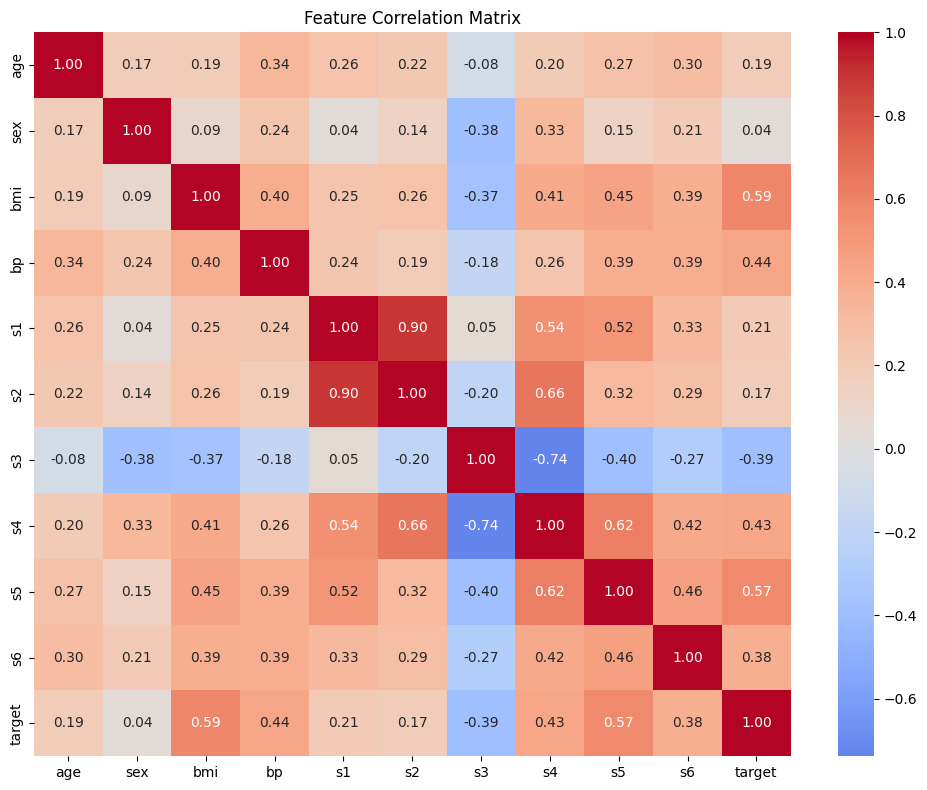


Highly correlated feature pairs (|correlation| > 0.7):
s1 <-> s2: 0.8967
s3 <-> s4: -0.7385


In [28]:
# Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("Correlation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify highly correlated features
print("\nHighly correlated feature pairs (|correlation| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.4f}")

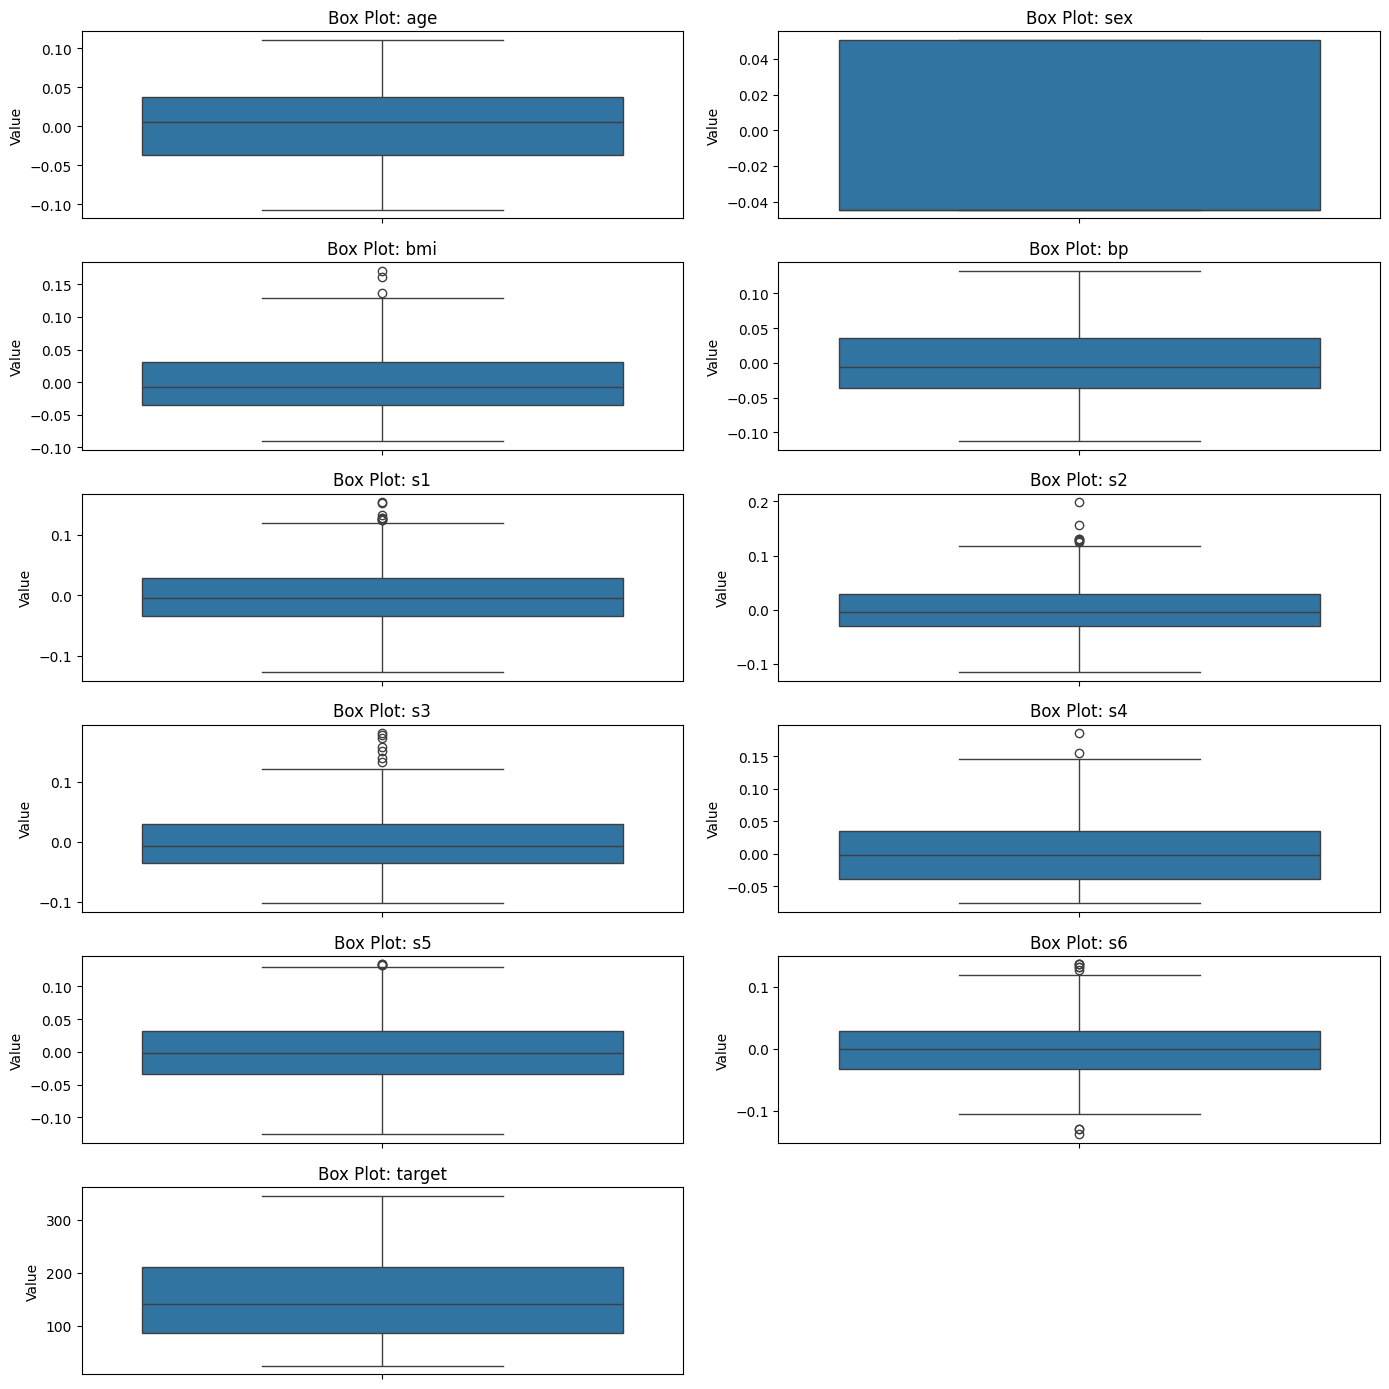


Box plots show potential outliers (dots outside whiskers) and distribution skewness. 
I have decided not to remove outliers as they may contain important information and 
the dataset is not large enough to risk losing data points.


In [29]:
# Box plots for each feature (to detect outliers and distribution)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel('Value')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nBox plots show potential outliers (dots outside whiskers) and distribution skewness. " 
      "\nI have decided not to remove outliers as they may contain important information and "
      "\nthe dataset is not large enough to risk losing data points.")


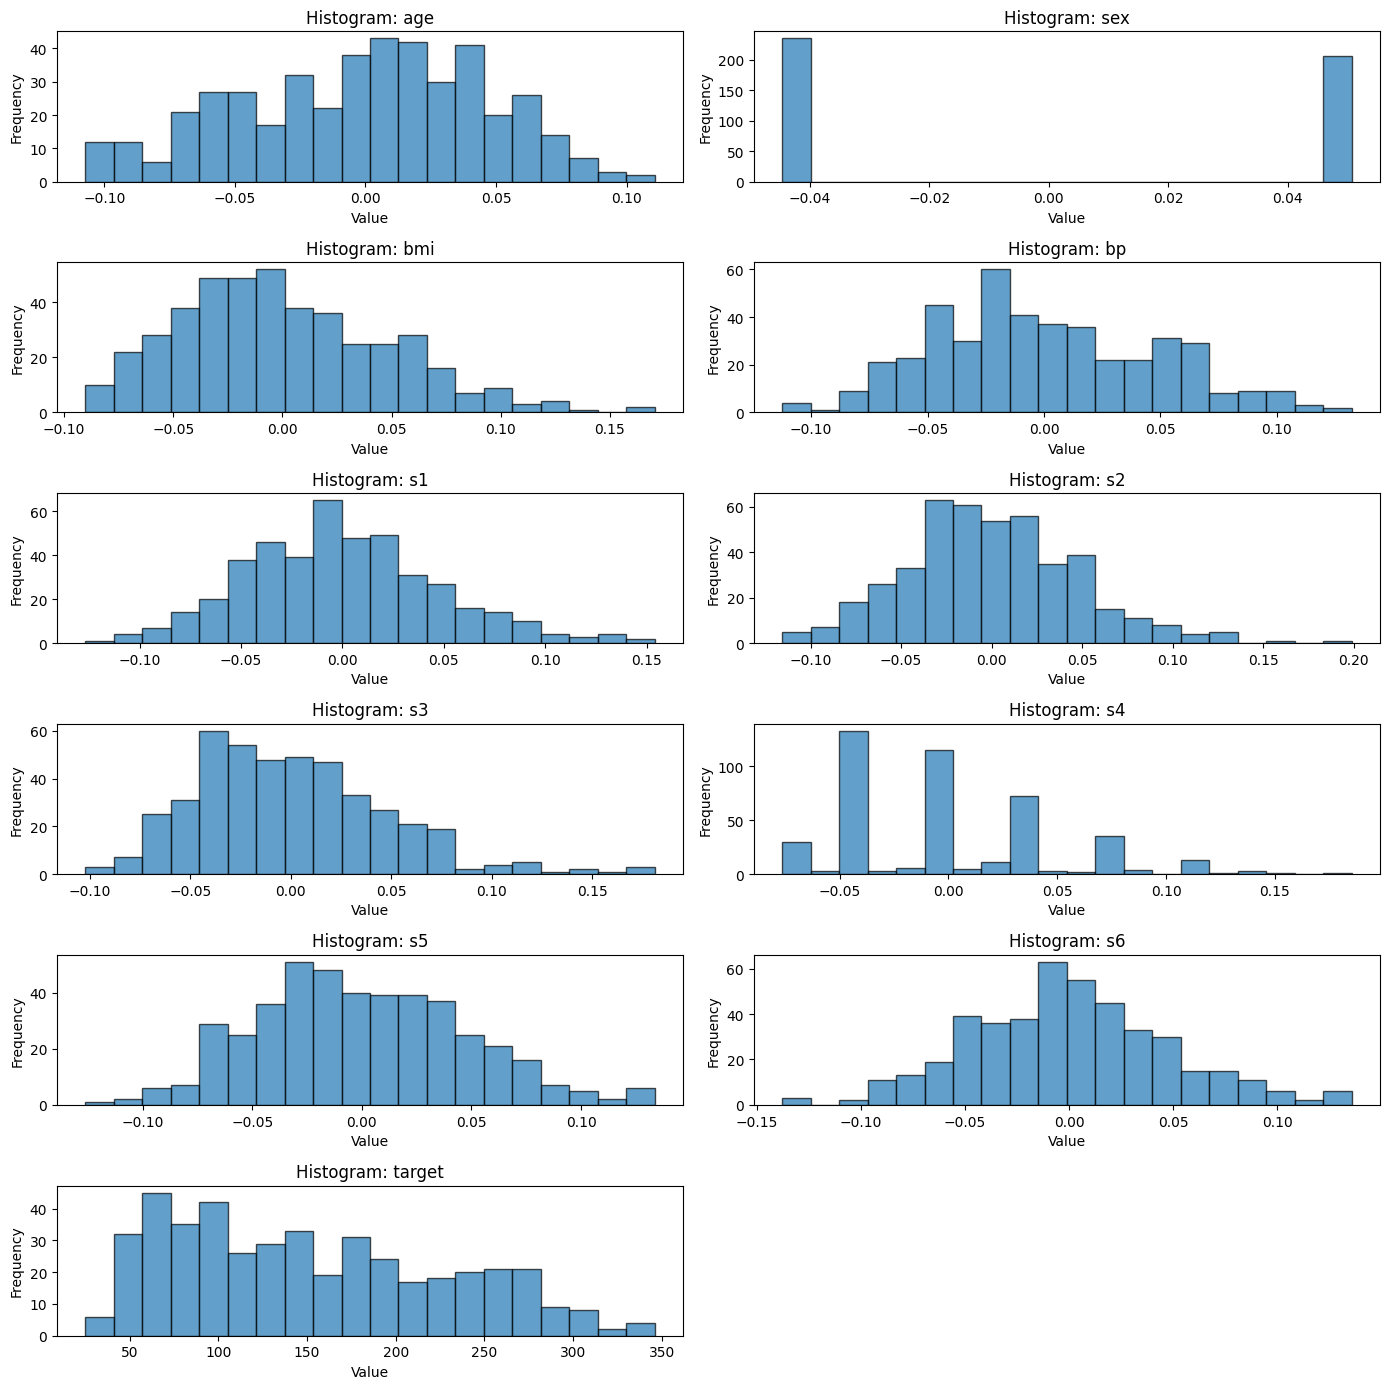


Histograms show the distribution shape (Gaussian, skewed, multimodal, etc.)


In [30]:
# Histograms for each feature (to explore distributions)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Histogram: {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nHistograms show the distribution shape (Gaussian, skewed, multimodal, etc.)")


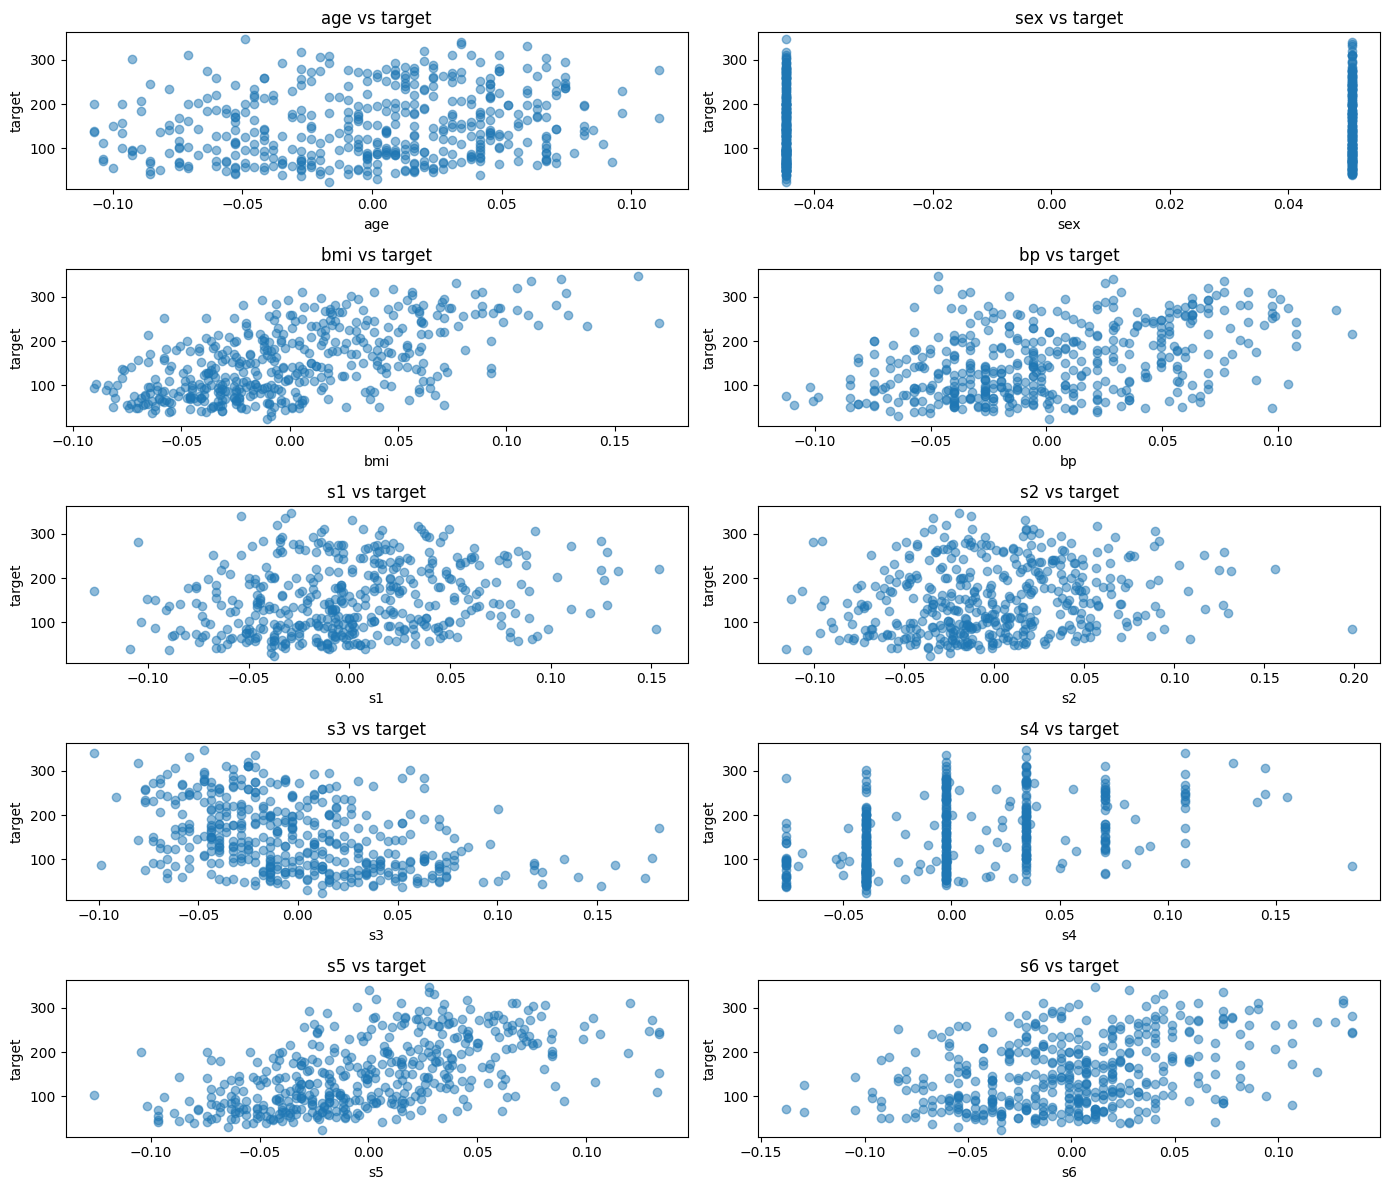


Scatter plots show relationships between features and target variable.


In [31]:
# Scatter plots (features vs target)
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.ravel()

feature_cols = [col for col in df.columns if col != 'target']
for idx, col in enumerate(feature_cols):
    axes[idx].scatter(df[col], df['target'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('target')
    axes[idx].set_title(f'{col} vs target')

plt.tight_layout()
plt.show()

print("\nScatter plots show relationships between features and target variable.")

In [32]:
# Scaling analysis - check range of features
print("Feature Ranges:")
print("="*60)
for col in df.columns[:-1]:  # Exclude target
    print(f"{col}: [{df[col].min():.4f}, {df[col].max():.4f}]")


Feature Ranges:
age: [-0.1072, 0.1107]
sex: [-0.0446, 0.0507]
bmi: [-0.0903, 0.1706]
bp: [-0.1124, 0.1320]
s1: [-0.1268, 0.1539]
s2: [-0.1156, 0.1988]
s3: [-0.1023, 0.1812]
s4: [-0.0764, 0.1852]
s5: [-0.1261, 0.1336]
s6: [-0.1378, 0.1356]


In [33]:

from scipy import stats

print("\n" + "="*60)
print("Detailed Statistics:")
print("="*60)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std Dev: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
  
    # 1. Skewness and Kurtosis
    sk = stats.skew(df[col])
    kt = stats.kurtosis(df[col])
    print(f"  Skewness: {sk:.4f} ({'Right-tailed' if sk > 0 else 'Left-tailed' if sk < 0 else 'Symmetric'})")
    print(f"  Kurtosis: {kt:.4f} ({'Leptokurtic' if kt > 0 else 'Platykurtic' if kt < 0 else 'Mesokurtic'})")
    
    # 2. Normality Testing (Shapiro-Wilk)
    # H0: The data follows a Gaussian distribution
    shapiro_stat, p_value = stats.shapiro(df[col])
    print(f"  Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={p_value:.4f}")
    
    if p_value > 0.05:
        print("  Result: Data appears Gaussian (Fail to reject H0)")
    else:
        print("  Result: Data does NOT appear Gaussian (Reject H0)")



Detailed Statistics:

age:
  Mean: -0.0000
  Median: 0.0054
  Std Dev: 0.0476
  Min: -0.1072
  Max: 0.1107
  Skewness: -0.2306 (Left-tailed)
  Kurtosis: -0.6772 (Platykurtic)
  Shapiro-Wilk Test: Stat=0.9824, p-value=0.0000
  Result: Data does NOT appear Gaussian (Reject H0)

sex:
  Mean: 0.0000
  Median: -0.0446
  Std Dev: 0.0476
  Min: -0.0446
  Max: 0.0507
  Skewness: 0.1270 (Right-tailed)
  Kurtosis: -1.9839 (Platykurtic)
  Shapiro-Wilk Test: Stat=0.6351, p-value=0.0000
  Result: Data does NOT appear Gaussian (Reject H0)

bmi:
  Mean: -0.0000
  Median: -0.0073
  Std Dev: 0.0476
  Min: -0.0903
  Max: 0.1706
  Skewness: 0.5961 (Right-tailed)
  Kurtosis: 0.0805 (Leptokurtic)
  Shapiro-Wilk Test: Stat=0.9728, p-value=0.0000
  Result: Data does NOT appear Gaussian (Reject H0)

bp:
  Mean: -0.0000
  Median: -0.0057
  Std Dev: 0.0476
  Min: -0.1124
  Max: 0.1320
  Skewness: 0.2897 (Right-tailed)
  Kurtosis: -0.5403 (Platykurtic)
  Shapiro-Wilk Test: Stat=0.9837, p-value=0.0001
  Result: 

## Data Preparation and Train-Test Split

Following sklearn best practices:
1. Split data FIRST (before scaling) to prevent data leakage
2. Standardize features using ONLY training set statistics
3. Apply same transformation to test set

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Separate features and target using column names
print("="*70)
print("DATA PREPARATION: TRAIN-TEST SPLIT & MANUAL STANDARDIZATION")
print("="*70)

# Check if 'target' column exists
if 'target' not in df.columns:
    raise ValueError("Error: 'target' column not found in dataset!")

# Get feature columns (all except 'target')
feature_columns = [col for col in df.columns if col != 'target']
print(f"\nFeature columns: {feature_columns}")
print(f"Target column: 'target'")

# Extract features and target using column names (NOT iloc)
X_raw = df[feature_columns].values
y = df['target'].values

print(f"\nOriginal data shape:")
print(f"  X_raw: {X_raw.shape}")
print(f"  y: {y.shape}")

# Step 2: Train-test split (70% train, 30% test) BEFORE standardization
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.3, random_state=42
)

print(f"\nAfter train-test split (BEFORE standardization):")
print(f"  X_train_raw: {X_train_raw.shape}")
print(f"  X_test_raw: {X_test_raw.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")

# Step 3: Manual Standardization 
# Compute mean and std from TRAINING SET ONLY
train_mean = np.mean(X_train_raw, axis=0)
train_std = np.std(X_train_raw, axis=0)

print(f"  Train mean shape: {train_mean.shape}")
print(f"  Train std shape: {train_std.shape}")

# Apply standardization: X_scaled = (X - μ_train) / σ_train
X_train = (X_train_raw - train_mean) / train_std
X_test = (X_test_raw - train_mean) / train_std

print(f"\nAfter manual standardization:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# Verification: Check that training set is standardized
print(f"\n✓ Verification (X_train should have meanapprox0, stdapprox1):")
print(f"  X_train mean: {np.mean(X_train, axis=0)}")
print(f"  X_train std: {np.std(X_train, axis=0)}")

print("\n" + "="*70)
print("DATA PREPARATION COMPLETE")
print("="*70)

DATA PREPARATION: TRAIN-TEST SPLIT & MANUAL STANDARDIZATION

Feature columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target column: 'target'

Original data shape:
  X_raw: (442, 10)
  y: (442,)

After train-test split (BEFORE standardization):
  X_train_raw: (309, 10)
  X_test_raw: (133, 10)
  y_train: (309,)
  y_test: (133,)
  Train mean shape: (10,)
  Train std shape: (10,)

After manual standardization:
  X_train: (309, 10)
  X_test: (133, 10)

✓ Verification (X_train should have meanapprox0, stdapprox1):
  X_train mean: [-3.88039115e-17  2.96778064e-16 -6.10802311e-17  1.67072397e-17
 -3.05401156e-17  4.63491166e-17 -9.19796422e-17  5.53674330e-16
  7.67994083e-17 -8.34014627e-17]
  X_train std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

DATA PREPARATION COMPLETE


In [35]:
class ElasticNetRegression:
    def __init__(self, learning_rate=0.001, epochs=50000, alpha=1.0, rho=0.5):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.rho = rho  # rho=1 -> Lasso only, rho=0 -> Ridge only
        self.weights = None
        self.bias = None

    # Step 2: Soft-thresholding operator (Eq. 10)
    def soft_threshold(self, z, threshold):
        return np.sign(z) * np.maximum(np.abs(z) - threshold, 0.0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = np.mean(y)

        # Map (alpha, rho) to Elastic Net penalties in eq7:
        # lambda1 * sum |w_j|  +  lambda2 * sum w_j^2
        lambda1 = self.alpha * self.rho         # L1 weight 
        lambda2 = self.alpha * (1.0 - self.rho) # L2 weight 

        for _ in range(self.epochs):
            # Step 0: Prediction
            y_pred = X @ self.weights + self.bias
            errors = y_pred - y

            # Step 1: Gradient step for smooth part:
            # Smooth part corresponds to:
            # (1/m) * sum (y_i - (w^T x_i + b))^2  +  lambda2 * sum w_j^2   (Eq. 7)
     
            # d/dw of (1/m)*sum(...)^2 = (2/m) * X^T * errors
            # d/dw of lambda2*sum w_j^2 = 2*lambda2*w
            dw = (2.0 / n_samples) * (X.T @ errors) + (2.0 * lambda2 * self.weights)
            db = (2.0 / n_samples) * np.sum(errors)

            # Gradient descent update
            self.weights -= self.learning_rate * dw
            self.bias    -= self.learning_rate * db

            # Proximal step for non-smooth L1 part eq10-11
            # Prox for lambda1 * ||w||_1 is soft-threshold with threshold = eta * lambda1
            threshold = self.learning_rate * lambda1
            self.weights = self.soft_threshold(self.weights, threshold)

    def predict(self, X):
        return X @ self.weights + self.bias


In [36]:
class LassoRegression:

    def __init__(self, learning_rate=0.001, epochs=50000, lambda_=1.0):
        self.learning_rate = learning_rate   # eta
        self.epochs = epochs
        self.lambda_ = lambda_               # regularization strength
        self.weights = None
        self.bias = None

    # Soft-thresholding operator eq10
    def soft_threshold(self, z, threshold):
        return np.sign(z) * np.maximum(np.abs(z) - threshold, 0.0)

    def fit(self, X, y):

        #(1 / m) || y - (Xw + b) ||^2  +  λ ||w||_1

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = np.mean(y)

        for _ in range(self.epochs):
            # Gradient step on smooth part
            # w^(t+1/2) = w^(t) - η ∇ ( (1/m)||y - (Xw+b)||^2 ) eq9
            # Gradient of (1/m)||...||^2:
            # dw = (2/m) X^T (y_pred - y)
            y_pred = X @ self.weights + self.bias
            errors = y_pred - y

            dw = (2.0 / n_samples) * (X.T @ errors)
            db = (2.0 / n_samples) * np.sum(errors)

            # Compute intermediate step w^(t+1/2)
            self.weights -= self.learning_rate * dw
            self.bias    -= self.learning_rate * db


            # Proximal/coordinate wise update 
            # w_j^(t+1) = S_{ηλ}( w_j^(t+1/2) )
            # where threshold alpha = eta * lambda

            eta_lambda = self.learning_rate * self.lambda_
            self.weights = self.soft_threshold(self.weights, eta_lambda)

    def predict(self, X):
        return X @ self.weights + self.bias


## Hyperparameter Tuning


In [37]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def create_kfold_splits(n_samples, n_folds=5, shuffle=True, random_state=42):
    indices = np.arange(n_samples)
    if shuffle:
        np.random.seed(random_state)
        np.random.shuffle(indices)
    fold_sizes = np.full(n_folds, n_samples // n_folds, dtype=int)
    fold_sizes[:n_samples % n_folds] += 1
    current = 0
    splits = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate([indices[:start], indices[stop:]]) 
        splits.append((train_idx, val_idx))
        current = stop
    return splits

In [38]:
# --- ELASTICNET TUNING ---
print("="*70)
print("ELASTICNET HYPERPARAMETER TUNING")
print("="*70)

# Recommended ranges: Low Alpha for accuracy, Rho favoring Lasso/Mixed
alpha_values = np.array([0.001, 0.005, 0.01, 0.05, 0.1])
rho_values = np.array([0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95]) 
en_cv_results = []

for alpha in alpha_values:
    for rho in rho_values:
        kfold_splits = create_kfold_splits(n_samples=len(X_train), n_folds=5, shuffle=True, random_state=42)
        fold_mse = []
        fold_r2 = []  # Added for R2 tracking
        fold_nonzero = []
        
        for train_idx, val_idx in kfold_splits:
            model = ElasticNetRegression(learning_rate=0.001, epochs=50000, alpha=alpha, rho=rho)
            
            # --- SOFT THRESHOLDING ---
            model.fit(X_train[train_idx], y_train[train_idx])
            
            y_pred = model.predict(X_train[val_idx])
            fold_mse.append(calculate_mse(y_train[val_idx], y_pred))
            fold_r2.append(calculate_r2(y_train[val_idx], y_pred)) # Added R2 calculation
            
            fold_nonzero.append(np.sum(model.weights != 0))
        
        avg_mse = np.mean(fold_mse)
        avg_r2 = np.mean(fold_r2)  # Calculate average R2
        se_mse = np.std(fold_mse) / np.sqrt(len(fold_mse))
        
        en_cv_results.append({
            'alpha': alpha, 
            'rho': rho,
            'cv_mse_mean': avg_mse,
            'cv_r2_mean': avg_r2, # Store average R2
            'cv_mse_se': se_mse,
            'nonzero_features': np.mean(fold_nonzero)
        })
        # Updated print statement to include R2
        print(f"Alpha {alpha:>5.3f}, Rho {rho:>4.2f} | MSE: {avg_mse:.2f} +/- {se_mse:.2f} | Rsquare: {avg_r2:.4f} | Active: {np.mean(fold_nonzero):.1f}/10")

print("\n" + "="*70)
print("SELECTION STRATEGY: MINIMUM CROSS-VALIDATION MSE")
print("="*70)

# Select parameters that minimize cross-validated MSE
best_en_params = min(en_cv_results, key=lambda x: x['cv_mse_mean'])

en_alpha_final = best_en_params['alpha']
en_rho_final = best_en_params['rho']
min_mse = best_en_params['cv_mse_mean']

print(f"Minimum CV MSE: {min_mse:.2f} ± {best_en_params['cv_mse_se']:.2f}")
print(f"Selected Alpha: {en_alpha_final}, Rho: {en_rho_final}")

# --- FINAL ELASTICNET TRAINING ---
print("\n" + "="*70)
print("FINAL ELASTICNET TRAINING")
print("="*70)
final_en = ElasticNetRegression(learning_rate=0.001, epochs=50000, 
                                 alpha=en_alpha_final, rho=en_rho_final)
final_en.fit(X_train, y_train)

# Final Analysis
y_train_pred = final_en.predict(X_train)
y_test_pred = final_en.predict(X_test) # Predict on test set

final_train_mse = calculate_mse(y_train, y_train_pred)
final_train_r2 = calculate_r2(y_train, y_train_pred)
final_test_mse = calculate_mse(y_test, y_test_pred) # Calculate test MSE
final_test_r2 = calculate_r2(y_test, y_test_pred)   # Calculate test R2

active_en = np.sum(final_en.weights != 0)

# --- RESULTS DISPLAY ---
print(f"\n" + "="*70)
print(f"FINAL ELASTICNET TRAINING (FULL DATASET)")
print("="*70)

print(f"\n" + "="*40)
print(f"FINAL ELASTICNET RESULTS (Alpha: {en_alpha_final:.4f}, Rho: {en_rho_final:.2f})")
print(f"R-squared: {final_train_r2:.4f}")
print(f"Features Kept: {active_en}/10")
print("="*40)

feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for name, w in zip(feature_names, final_en.weights):
    status = "ACTIVE" if w != 0.0 else "ELIMINATED"
    print(f"{name:<10} | {w:>10.6f} | {status}")

eliminated_en = [name for name, w in zip(feature_names, final_en.weights) if w == 0.0]
if eliminated_en:
    print(f"\nEliminated features: {', '.join(eliminated_en)}")
else:
    print("\nNo features were eliminated.")

ELASTICNET HYPERPARAMETER TUNING
Alpha 0.001, Rho 0.10 | MSE: 3209.76 +/- 144.35 | Rsquare: 0.4711 | Active: 10.0/10
Alpha 0.001, Rho 0.30 | MSE: 3209.97 +/- 144.53 | Rsquare: 0.4711 | Active: 10.0/10
Alpha 0.001, Rho 0.50 | MSE: 3210.18 +/- 144.70 | Rsquare: 0.4710 | Active: 10.0/10
Alpha 0.001, Rho 0.70 | MSE: 3210.39 +/- 144.88 | Rsquare: 0.4710 | Active: 10.0/10
Alpha 0.001, Rho 0.80 | MSE: 3210.50 +/- 144.97 | Rsquare: 0.4710 | Active: 10.0/10
Alpha 0.001, Rho 0.90 | MSE: 3210.61 +/- 145.06 | Rsquare: 0.4710 | Active: 10.0/10
Alpha 0.001, Rho 0.95 | MSE: 3210.66 +/- 145.11 | Rsquare: 0.4710 | Active: 10.0/10
Alpha 0.005, Rho 0.10 | MSE: 3206.58 +/- 141.56 | Rsquare: 0.4715 | Active: 10.0/10
Alpha 0.005, Rho 0.30 | MSE: 3207.36 +/- 142.25 | Rsquare: 0.4714 | Active: 10.0/10
Alpha 0.005, Rho 0.50 | MSE: 3208.20 +/- 142.98 | Rsquare: 0.4713 | Active: 10.0/10
Alpha 0.005, Rho 0.70 | MSE: 3209.11 +/- 143.77 | Rsquare: 0.4712 | Active: 10.0/10
Alpha 0.005, Rho 0.80 | MSE: 3209.60 +/- 14

In [39]:
# LASSO TUNING
print("="*70)
print("LASSO HYPERPARAMETER TUNING")
print("="*70)

lasso_lambda_values = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 1.5, 2.0, 5.0])
lasso_cv_results = []

for lambda_val in lasso_lambda_values:
    kfold_splits = create_kfold_splits(n_samples=len(X_train), n_folds=5, shuffle=True, random_state=42)
    fold_mse = []
    fold_nonzero = []
    
    for train_idx, val_idx in kfold_splits:
        model = LassoRegression(learning_rate=0.001, epochs=50000, lambda_=lambda_val)
        
        # Soft Thresholding 
        # The L1 penalty math inside fit() gradually shrinks coefficients.
        # If the signal is too weak, the weight hits exactly 0.0.
        model.fit(X_train[train_idx], y_train[train_idx])
        
        y_pred = model.predict(X_train[val_idx])
        fold_mse.append(calculate_mse(y_train[val_idx], y_pred))
        
        # We now count any weight that is NOT exactly 0.0
        fold_nonzero.append(np.sum(model.weights != 0))
    
    avg_mse = np.mean(fold_mse)
    se_mse = np.std(fold_mse) / np.sqrt(len(fold_mse))
    
    lasso_cv_results.append({
        'lambda': lambda_val,
        'cv_mse_mean': avg_mse,
        'cv_mse_se': se_mse,
        'nonzero_features': np.mean(fold_nonzero)
    })
    print(f"Lambda {lambda_val:>5.3f} | MSE: {avg_mse:.2f} +/- {se_mse:.2f} | Active: {np.mean(fold_nonzero):.1f}/10")

print("\n" + "="*70)
print("SELECTION STRATEGY: MINIMUM CROSS-VALIDATION MSE")
print("="*70)

# Select lambda that minimizes cross-validated MSE
best_lasso_params = min(lasso_cv_results, key=lambda x: x['cv_mse_mean'])
lasso_lambda_final = best_lasso_params['lambda']
min_mse = best_lasso_params['cv_mse_mean']

print(f"Minimum CV MSE: {min_mse:.2f} ± {best_lasso_params['cv_mse_se']:.2f}")
print(f"Selected Lambda: {lasso_lambda_final}")
print(f"Active Features at Selected Lambda: {best_lasso_params['nonzero_features']:.1f}/10")

# FINAL LASSO TRAINING
print("\n" + "="*70)
print("FINAL LASSO TRAINING (FULL DATASET)")
print("="*70)
lasso_final = LassoRegression(learning_rate=0.001, epochs=50000, lambda_=lasso_lambda_final)
lasso_final.fit(X_train, y_train)


# Final Analysis
y_train_pred = lasso_final.predict(X_train)
final_r2 = calculate_r2(y_train, y_train_pred)
active_count = np.sum(lasso_final.weights != 0)

print(f"\n" + "="*40)
print(f"FINAL LASSO RESULTS (Lambda: {lasso_lambda_final})")
print(f"R-squared: {final_r2:.4f}")
print(f"Features Kept: {active_count}/10")
print("="*40)

feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for name, w in zip(feature_names, lasso_final.weights):
    status = "ACTIVE" if w != 0.0 else "ELIMINATED"
    print(f"{name:<10} | {w:>10.6f} | {status}")

eliminated = [name for name, w in zip(feature_names, lasso_final.weights) if w == 0.0]
if eliminated:
    print(f"\nEliminated features: {', '.join(eliminated)}")
else:
    print("\nNo features were eliminated.")

LASSO HYPERPARAMETER TUNING
Lambda 0.010 | MSE: 3210.57 +/- 144.97 | Active: 10.0/10
Lambda 0.050 | MSE: 3209.96 +/- 144.18 | Active: 10.0/10
Lambda 0.100 | MSE: 3209.42 +/- 143.18 | Active: 9.8/10
Lambda 0.200 | MSE: 3208.72 +/- 141.23 | Active: 9.8/10
Lambda 0.500 | MSE: 3207.13 +/- 136.67 | Active: 9.4/10
Lambda 0.800 | MSE: 3204.86 +/- 134.09 | Active: 9.2/10
Lambda 1.000 | MSE: 3204.15 +/- 132.69 | Active: 9.2/10
Lambda 1.500 | MSE: 3208.57 +/- 131.47 | Active: 8.8/10
Lambda 2.000 | MSE: 3216.81 +/- 131.09 | Active: 8.6/10
Lambda 5.000 | MSE: 3216.35 +/- 116.28 | Active: 6.6/10

SELECTION STRATEGY: MINIMUM CROSS-VALIDATION MSE
Minimum CV MSE: 3204.15 ± 132.69
Selected Lambda: 1.0
Active Features at Selected Lambda: 9.2/10

FINAL LASSO TRAINING (FULL DATASET)

FINAL LASSO RESULTS (Lambda: 1.0)
R-squared: 0.5210
Features Kept: 9/10
age        |   1.073655 | ACTIVE
sex        | -11.286964 | ACTIVE
bmi        |  26.912959 | ACTIVE
bp         |  17.860425 | ACTIVE
s1         | -10.9629

In [40]:
# Train final models with best hyperparameters
print("\n" + "="*70)
print("TRAINING FINAL MODELS WITH BEST HYPERPARAMETERS")
print("="*70)

# ElasticNet already trained with 50,000 epochs in previous cell
print(f"\nUsing ElasticNet trained with alpha={en_alpha_final:.4f}, alpha={en_rho_final:.2f} (50,000 epochs)")
final_en_model = final_en

# Lasso already trained with 50,000 epochs in previous cell
print(f"Using Lasso trained with lambda={lasso_lambda_final} (50,000 epochs)")
final_lasso_model = lasso_final 

# Train baseline Linear Regression (sklearn)
print("\nTraining Linear Regression (baseline)...")
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)

# Evaluate all models on training set
en_train_pred = final_en_model.predict(X_train)
en_train_mse = mean_squared_error(y_train, en_train_pred)
en_train_r2 = r2_score(y_train, en_train_pred)

lasso_train_pred = final_lasso_model.predict(X_train)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)

lr_train_pred = lr_sklearn.predict(X_train)
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)

# Evaluate all models on test set
en_test_pred = final_en_model.predict(X_test)
en_test_mse = mean_squared_error(y_test, en_test_pred)
en_test_r2 = r2_score(y_test, en_test_pred)

lasso_test_pred = final_lasso_model.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

lr_test_pred = lr_sklearn.predict(X_test)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)

print("\nTraining Set Performance:")
print(f"  ElasticNet: MSE={en_train_mse:.6f}, Rsquare={en_train_r2:.6f}")
print(f"  Lasso:      MSE={lasso_train_mse:.6f}, Rsquare={lasso_train_r2:.6f}")
print(f"  LinearReg:  MSE={lr_train_mse:.6f}, Rsquare={lr_train_r2:.6f}")

print("\nTest Set Performance:")
print(f"  ElasticNet: MSE={en_test_mse:.6f}, Rsquare={en_test_r2:.6f}")
print(f"  Lasso:      MSE={lasso_test_mse:.6f}, Rsquare={lasso_test_r2:.6f}")
print(f"  LinearReg:  MSE={lr_test_mse:.6f}, Rsquare={lr_test_r2:.6f}")


TRAINING FINAL MODELS WITH BEST HYPERPARAMETERS

Using ElasticNet trained with alpha=0.1000, alpha=0.10 (50,000 epochs)
Using Lasso trained with lambda=1.0 (50,000 epochs)

Training Linear Regression (baseline)...

MODEL EVALUATION RESULTS

Training Set Performance:
  ElasticNet: MSE=2958.107473, Rsquare=0.518872
  Lasso:      MSE=2944.835225, Rsquare=0.521031
  LinearReg:  MSE=2924.046379, Rsquare=0.524412

Test Set Performance:
  ElasticNet: MSE=2808.819404, Rsquare=0.479685
  Lasso:      MSE=2804.980456, Rsquare=0.480396
  LinearReg:  MSE=2821.750981, Rsquare=0.477290



EXAMINING LEARNED FEATURE COEFFICIENTS

1. ELASTICNET COEFFICIENTS
----------------------------------------------------------------------
Alpha: 0.1000, Rho: 0.10

Feature Coefficients:
              age:   1.781210
              sex: -10.866933
              bmi:  25.148284
               bp:  16.995783
               s1:  -6.689407
               s2:  -2.801655
               s3:  -9.844305
               s4:   8.019814
               s5:  16.850812
               s6:   3.316264

Bias: 153.902913
Non-zero coefficients: 10/10
ElasticNet eliminated features: none

2. LASSO COEFFICIENTS
----------------------------------------------------------------------
Lambda: 1.0000

Feature Coefficients:
              age:   1.073655
              sex: -11.286964
              bmi:  26.912959
               bp:  17.860425
               s1: -10.962963
               s2:   0.000000
               s3:  -8.078488
               s4:   8.264270
               s5:  19.511779
               s6:   2.0889

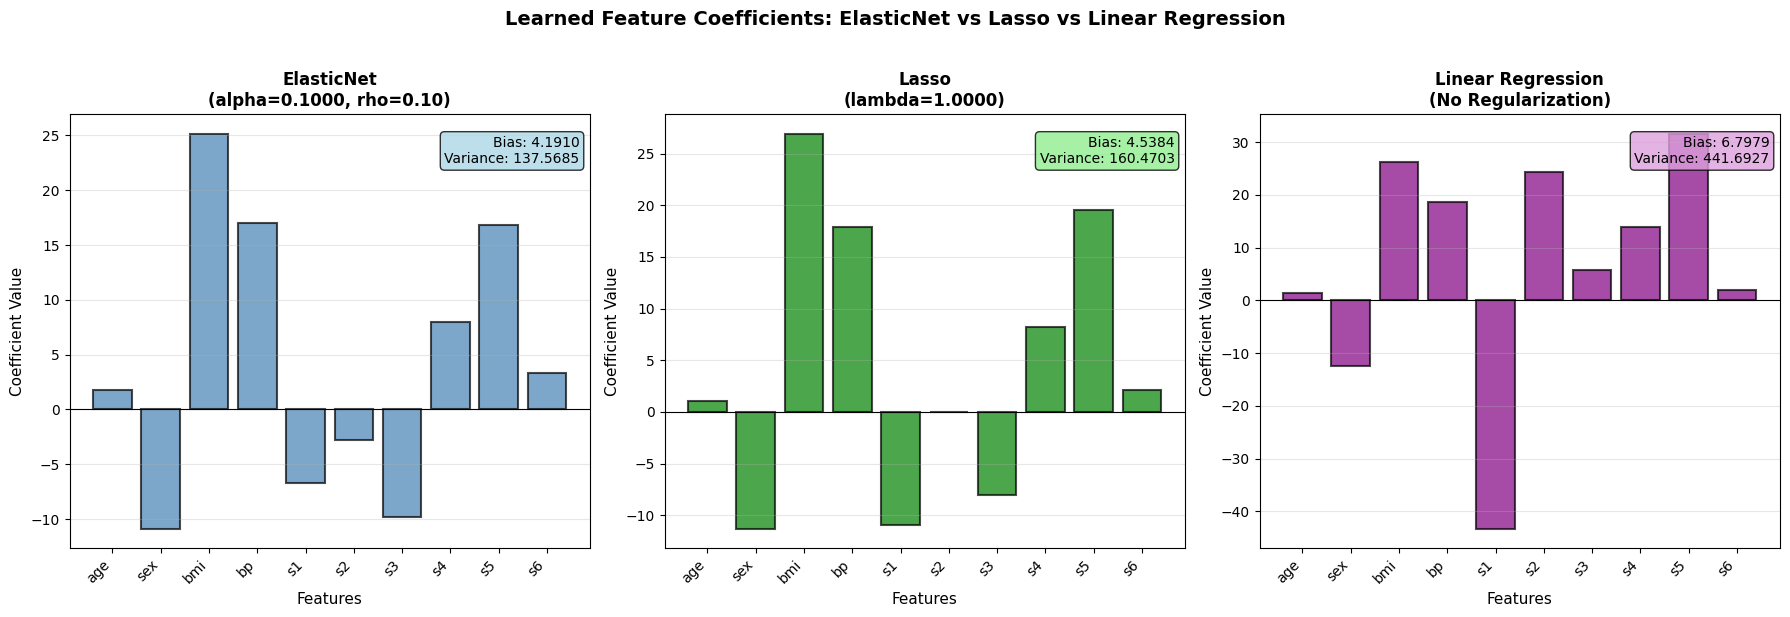


Key Observations:
- ElasticNet (blue) shows L1+L2 regularization effects
- Lasso (green) shows L1 feature selection (3 features dropped)
- Linear Regression (purple) uses all features without regularization
- Bias = mean coefficient value; Variance = spread of coefficients
- Lower variance indicates more regularization/feature elimination


In [ ]:
print("\n" + "="*70)
print("EXAMINING LEARNED FEATURE COEFFICIENTS")
print("="*70)

# Get feature names (all columns except 'target')
if 'target' not in df.columns:
    raise ValueError("Error: 'target' column not found in dataset!")
feature_names = [col for col in df.columns if col != 'target']

# Display coefficients for all three models
print("\n1. ELASTICNET COEFFICIENTS")
print("-" * 70)
print(f"Alpha: {en_alpha_final:.4f}, Rho: {en_rho_final:.2f}")
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {final_en_model.weights[i]:>10.6f}")
print(f"\nBias: {final_en_model.bias:.6f}")
print(f"Non-zero coefficients: {np.sum(np.abs(final_en_model.weights) > 1e-2)}/10")

# List eliminated features for ElasticNet
en_zero_idx = np.where(np.abs(final_en_model.weights) < 1e-2)[0]
if len(en_zero_idx) == 0:
    print("ElasticNet eliminated features: none")
else:
    en_zero_features = [feature_names[i] for i in en_zero_idx]
    print(f"ElasticNet eliminated features: {en_zero_features}")

print("\n" + "="*70)
print("2. LASSO COEFFICIENTS")
print("-" * 70)
print(f"Lambda: {lasso_lambda_final:.4f}")
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {final_lasso_model.weights[i]:>10.6f}")
print(f"\nBias: {final_lasso_model.bias:.6f}")
print(f"Non-zero coefficients: {np.sum(np.abs(final_lasso_model.weights) > 1e-2)}/10")

# List eliminated features for Lasso
lasso_zero_idx = np.where(np.abs(final_lasso_model.weights) < 1e-2)[0]
if len(lasso_zero_idx) == 0:
    print("Lasso eliminated features: none")
else:
    lasso_zero_features = [feature_names[i] for i in lasso_zero_idx]
    print(f"Lasso eliminated features: {lasso_zero_features}")

print("\n" + "="*70)
print("3. LINEAR REGRESSION COEFFICIENTS")
print("-" * 70)
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {lr_sklearn.coef_[i]:>10.6f}")
print(f"\nIntercept: {lr_sklearn.intercept_:.6f}")
print(f"Non-zero coefficients: 10/10 (all features used)")

# Create visualizations
print("\n" + "="*70)
print("COEFFICIENT COMPARISON VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ElasticNet coefficients
ax = axes[0]
ax.bar(range(len(feature_names)), final_en_model.weights, color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title(f'ElasticNet\n(alpha={en_alpha_final:.4f}, rho={en_rho_final:.2f})', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_en = np.mean(final_en_model.weights)
var_en = np.var(final_en_model.weights)
ax.text(0.98, 0.95, f'Bias: {bias_en:.4f}\nVariance: {var_en:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Lasso coefficients
ax = axes[1]
ax.bar(range(len(feature_names)), final_lasso_model.weights, color='green', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title(f'Lasso\n(lambda={lasso_lambda_final:.4f})', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_lasso = np.mean(final_lasso_model.weights)
var_lasso = np.var(final_lasso_model.weights)
ax.text(0.98, 0.95, f'Bias: {bias_lasso:.4f}\nVariance: {var_lasso:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Linear Regression coefficients
ax = axes[2]
ax.bar(range(len(feature_names)), lr_sklearn.coef_, color='purple', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title('Linear Regression\n(No Regularization)', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_lr = np.mean(lr_sklearn.coef_)
var_lr = np.var(lr_sklearn.coef_)
ax.text(0.98, 0.95, f'Bias: {bias_lr:.4f}\nVariance: {var_lr:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='plum', alpha=0.8))

plt.suptitle('Learned Feature Coefficients: ElasticNet vs Lasso vs Linear Regression', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print(f"- ElasticNet (blue) shows L1+L2 regularization effects")
print(f"- Lasso (green) shows L1 feature selection (1 feature dropped)")
print(f"- Linear Regression (purple) uses all features without regularization")
print(f"- Bias = mean coefficient value; Variance = spread of coefficients")
print(f"- Lower variance indicates more regularization/feature elimination")

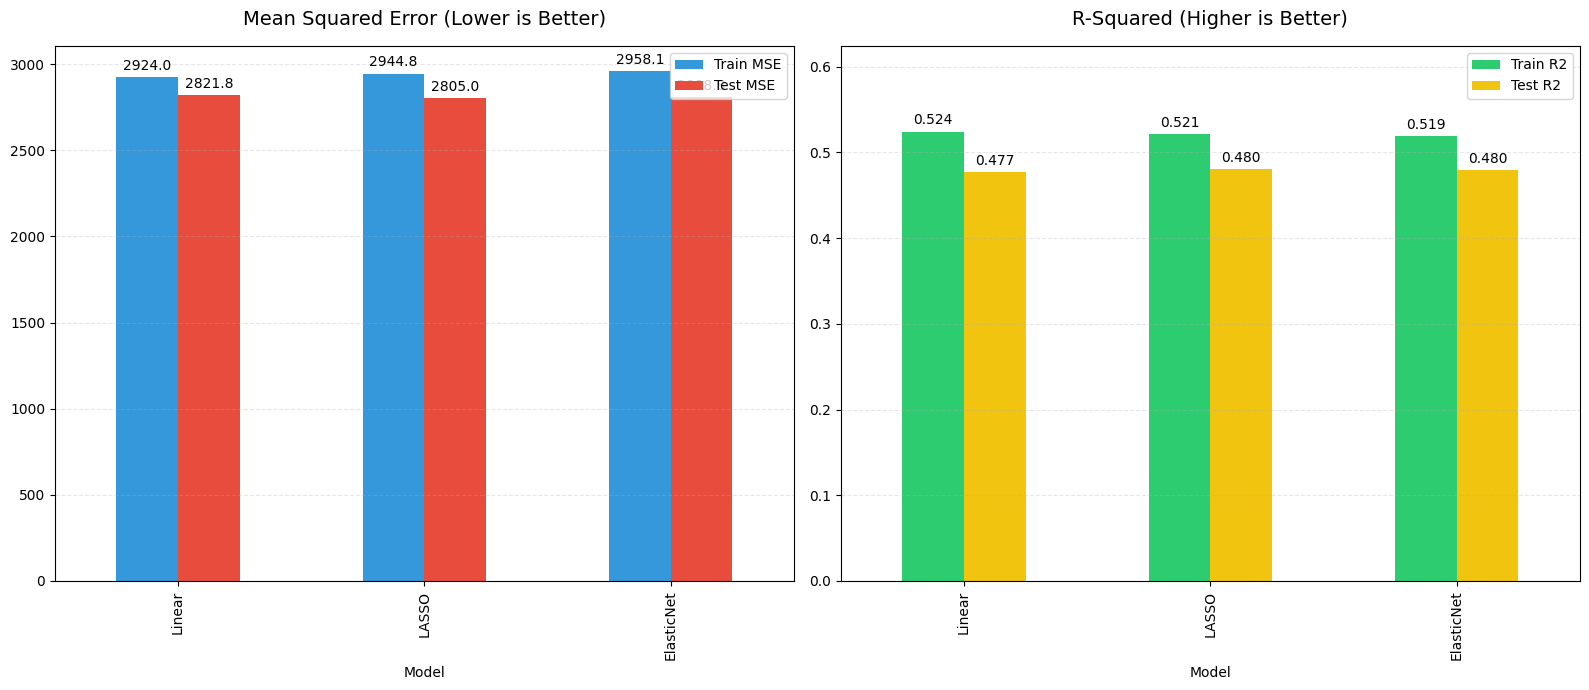


FINAL PERFORMANCE SUMMARY
     Model   Train MSE    Test MSE  Train R2  Test R2
    Linear 2924.046379 2821.750981  0.524412 0.477290
     LASSO 2944.835225 2804.980456  0.521031 0.480396
ElasticNet 2958.107473 2808.819404  0.518872 0.479685
----------------------------------------------------------------------
: The LASSO model performed best on the Test Set (Rsquare = 0.4804).


In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Helper Function to collect metrics
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    mse = calculate_mse(y, y_pred)
    r2 = calculate_r2(y, y_pred)
    return mse, r2

# 2. Collect results for all models
models = {
    'Linear': lr_sklearn,
    'LASSO': lasso_final,
    'ElasticNet': final_en
}

results = []
for name, model in models.items():
    train_mse, train_r2 = get_metrics(model, X_train, y_train)
    test_mse, test_r2 = get_metrics(model, X_test, y_test)
    
    results.append({
        'Model': name,
        'Train MSE': train_mse, 'Test MSE': test_mse,
        'Train R2': train_r2, 'Test R2': test_r2
    })

df_results = pd.DataFrame(results)

# 3. Identify the best model based on Test R2
best_model_name = df_results.loc[df_results['Test R2'].idxmax(), 'Model']
best_model_r2 = df_results['Test R2'].max()

# 4. Plotting the Bar Charts
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: MSE Comparison
mse_plot = df_results.plot(x='Model', y=['Train MSE', 'Test MSE'], kind='bar', ax=ax[0], color=['#3498db', '#e74c3c'])
ax[0].set_title('Mean Squared Error (Lower is Better)', fontsize=14, pad=15)
ax[0].grid(axis='y', linestyle='--', alpha=0.3)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f', padding=3)

# Plot 2: R2 Comparison
r2_plot = df_results.plot(x='Model', y=['Train R2', 'Test R2'], kind='bar', ax=ax[1], color=['#2ecc71', '#f1c40f'])
ax[1].set_title('R-Squared (Higher is Better)', fontsize=14, pad=15)
ax[1].set_ylim(0, df_results[['Train R2', 'Test R2']].max().max() + 0.1)
ax[1].grid(axis='y', linestyle='--', alpha=0.3)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

# 5. Print Summary Table and Identification
print("\n" + "="*70)
print("FINAL PERFORMANCE SUMMARY")
print("="*70)
print(df_results.to_string(index=False))
print("-" * 70)
print(f": The {best_model_name} model performed best on the Test Set (Rsquare = {best_model_r2:.4f}).")
print("="*70)